In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



## 1.1 Introduction to Probability and Statistics
- Make a question from certainity to uncertainity. Use statistic and probability to solve this !
  1. Navigation Software
     * Certainty: Find the shortest route from a to b. 
     * Uncertainty: Find the fastest route from a to b.
  2. Search Engine
     * Certainty: Find all web pages that contain the words 'Trump','Hillary', and 'Debate'
     * Uncertainty: Find the 10 most relevant pages for the query 'Trump, Hilarry Debate'
  3. Insurance Company
     * Certainty: If a person with life insurance dies, the insurance company has to pay the family $X
     * Uncertainty: What is the minimal life insurance premium such that the probability that the life insurance
       company will be bankrupt in 10 years is smaller than 1%? 

## 1.2 What is Probability Theory

Flip the coin k times, say k = 1000, then the number of 'heads' is about $\frac{k}{2} = \frac{1000}{2}= 500$

### Simulating Coins

Use the pseudo random number generators in numpy to simulate the coin flips.
<t>Instead of 'Heads' and 'Tails' use $x_i = 1$ or $x_i = -1$  and consider the sum $S_{100} = x_1 + x_2 + ... + x_{100}$.
<t>If the number of heads is about 500 then $S_{100} \approx 0$

In [2]:
from numpy import random
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    X = 2*(random.rand(k,n)>0.5)-1 # generate k x n matrix of +- random numbers
    S= sum(X)
    return S

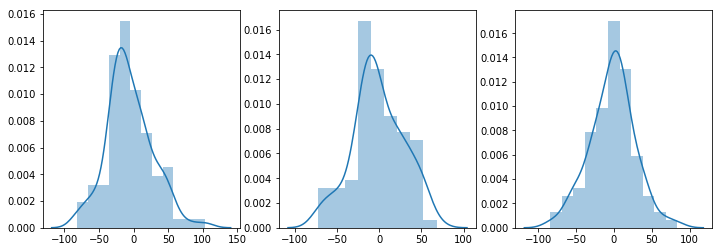

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Flipping a fair coin 1000 times
S_1 = generate_counts()
S_2 = generate_counts()
S_3 = generate_counts()

fig_size = (12,4)
figure , axes = plt.subplots(figsize= fig_size,ncols=3)

sns.distplot(S_1, ax = axes[0])
sns.distplot(S_2, ax= axes[1])
sns.distplot(S_3, ax=axes[2])

plt.tight_layout
plt.show()

From above, we know that every experiment you get histogram slightly different. But there is something in common for all of these coin flips.
<t> They are all concentrated around zero
<t> Note: The $S_{1000}$ is not exactly 0, it is only close to 0.

Using Probability theory we can calculate how small is |$S_k$|
<t> The Probability is :
    $$|S_k| \geq 4 \sqrt{k}$$
<t> is smaller than $2 x 10^{-8}$ which is $0.000002%$
    
    


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Flipping a fair coin 1000 times
S_1 = generate_counts(k =100)
S_2 = generate_counts(k =1000)
S_3 = generate_counts(k =10000)

fig_size = (12,4)
figure , axes = plt.subplots(figsize= fig_size,ncols=3)

sns.distplot(S_1, ax = axes[0])
axes[0].set_xlim(-100,100)

sns.distplot(S_2, ax= axes[1])
axes[1].set_xlim(-1000,1000)

sns.distplot(S_3, ax=axes[2])
axes[2].set_xlim(-10000,10000)

plt.tight_layout
plt.show()

We can infer that the more coin you flips, the closer it is relatively to the range to zero 

### Summary
The sum $S_k$ is (almost)always in the range $$-4 \sqrt{k}, +4\sqrt{k}$$

<t> Probability theory is the math involved in proving (a precise version of) the statements above
<t> Actually, we can approximate probabilities using simulations (Monte-Carlo Simulations), but this isn't enough, why ?
* Calculating the probabilities is better because:
    - It provides a precise answer
    - It is much faster than Monte Carlo Simulations

Simulasi monte carlo adalah sebuah simulasi untuk menentukan suatu angka random dari data sampel dengan berdistribusi tertentu. Tujuan simulasi Monte carlo adalah menemukan nilai yang mendekati nilai sesungguhnya, atau nilai yang akan terjadi berdasarkan distribusi dari data sampling. Oleh sebab kemampuannya mampu memprediksi suatu nilai, maka Monte Carlo dahulu sering digunakan untuk kepentingan judi di kasino.

## 1.3 What is Statistics ?
Probability theory computes probabilities of complex events given the underlying base probabilities.
<t> We are given data that was generated by a Stochastic Process.
<t> We infer properties of the underlying base probabilities.

We flip a coin 1000 times and get 570 heads. Can we conclude that the coin is biased(not fair)?
<t> What can we conclude if we got 507 heads?
    
**Answer that with Logical of Statistical Inference: **
- Suppose that the coin is fair.
- Use probability theory to compute the probability of getting atleast 570(507) heads.
- If this probability is very small, then we can reject with confidence the hypothesis that the coin is fair.

1. If number of heads is 570 then $S_{1000}$ = 570-430 = 140
  * It is very unlikely that $|S_{1000}| > 4 \sqrt{k} \approx 126.5$
  * So, it is very unlikely that the coin is unbiased.
  * The probability is extremely small. So we can conclude, with high confidence that the coin is biased.
    
<t>
2. If number of heads is 507 then $S_{1000}$ = 507-493 = 14
  * $S_n = 14$, 14 << 126,5
  * Fair coin would generate 507 heads.
  * Getting 507 heads does not provide evidence that the coin is biased.
  * So, we cannot deduce bias with certainty.

### Real-World Examples
1. Case I : Polls
   - Suppose there are just two parties: D and R.
   - Call a small randomly selected set of people, then extrapolate what do people think in general.
   - Can you say with confidence that there more D votes, or more R votes?
   - Mathematically equivalent to flipping a biased coin and
   - asking whether you can say with confidence that it is biased towards 'Heads' or towards 'Tails'
2. Case II : A/B testing
   - A/B refer to two alternative designs for the page.
   - To see which design users prefer we randomly present design A or design B.
   - We measure how long the user stayed on a page, or whether the user clicked on an advertisement
   - We want to decide, with confidence, which of the two designs is better.
   - Again: similar to making a decision with confidence on whether 'Heads' is more probably than 'Tails' or vice versa.

## 1.4 A Puzzle
- Suppose we have three cards in a hat:
   1. RB - One card is painted blue on one side and red on the other.
   2. BB - One card is painted blue on both sides.
   3. RR - One card is painted red on both sides.
   
- The Setup:
   1. I pick one of the three cards at random, flip it to a random side, and place it on the table.
- Do you want to bet?
   1. If the other side of the card has a different i pay you $1.
   2. If the other side has the same color you pay me \$1.
   
- Use Monte-Carlo Simulations
   - Conclusion:
     1. You are twice as likely to lose as you are to win.
     2. On average you lose 33 cents per iteration: \$1x(2/3) - $1x(1/3)
     
- How can we be sure?
  1. The original argument also sounds convincing, but is wrong.
  2. To be sure that our argument is correct, we need to define some concept, including outcome and event. 

## 1.5 History of Probability and Statistics
- It would help to know what is the general framework
- and What are the kind of questions, that people ask in statistic.

Modern forms started around 1650, fall into two groups in general:
1. Repeated games of chance.
2. Strength of evidence and degrees of belief.

### Games of Chance

Equal Probability Assumption : All outcomes have the same probability

1. True for dice and roulette (Symmetric).
2. Not true for knuckle bones (Asymmetric).

#### Long Term Frequencies
- Each knucklebone is different, the probabilites are different.
- Suppose we have P(6)=0.1 , P(1)=0.2, P(3)=0.3, P(4)=0.4

<t> Using Simulation you get, the more you flip the knuckle bones the more it will be same (frequencies) for the probability we have. This is called Long Term Frequencies.
    So, if you just flip small times it won't get the true probability.

#### The Frequentist point of view
* To assign a probabilities to the outcomes of a game/experiment is the same as saying that if we repeat the game many times, the long term frequencies of the outcomes
  converge to the probabilities. This is the meaning of probabilities.
* Provides a solid foundation on which probability theory is built.
* Makes sense in games and other situations where one can repeat the same random choice many times.

But it is not always to think possibility that way....

- Situations where repetitions is hard:
1. A meteorologist says that the probability of rain tommorow is 10%.
   - What does that mean ?
   - It will either rain or not rain.
   - Tommorow happens only once.
2. Suppose a surgeon says that there is a 2% chance of complications with a particular surgery.
   - It might mean that 2% of the patients that underwent the surgery had complications.
   - What does it mean for you?
   - Maybe most of the complications where with patiens older than 90 (and you are 35)

This leads to other type of probability that has to do with confidence, with measuring evidence and basically quantifying opinions.

- Words of 'probable' and 'probably' have common use meanings that is qualitative, not quantitative. Probable is very likely to happen..
- To make probable quantitave some authority has to approved it.
- We have some evidence towards some conclusions, but we are not sure how to weigh different evidences that might be contradictory.

### Combining Evidence
- Central to many fields:  Medicine, economics, investment, Law, Science, Technology...
- To combine evidence quantitatively use probability and statistics.
- Typically, you don't repeat an experiment many times.
- The math used is probability theory, but much of the discussion is not mathematical.
- A popular approach : Bayesian Statistics. How to evaluate evidence and how to combine evidence ?

Hypothesis testing and P-value which is the frequentist approach to arguing about degrees of belief.

## Programming Assignment

<font size="4" style="color:red;"> **IMPORTANT: ** Only modify cells which have the following comment</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells when submitting homework. For Docker users, to test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>



# Exercises:
**Note: ** Make sure you have read the *What is Probability?* notebook before attempting these exercises.

In this excercise you will write code to estimate the probability that $n$ flips of a fair coin will result in number of `"heads"` between $k_1$ and $k_2$.

You should write the body of two functions:
1. <code><font color="blue">seq_sum</font>(n)</code>: generates a random sequence of coin flips and counts the number of heads.
2. <code><font color="blue">estimate_prob</font>(n,k1,k2,m)</code>: Using calls to `seq_sum`, estimate the probability of the number of heads being between $k_1$ and $k_2$. 


### Notebook Setup:

The folowing magic command downloads many python packages like *numpy* and allows the notebooks to plot graphs with *matplotlib*. 

<font color="red">**DO NOT**</font> import other packages. You already have all the packages you need.

Specifically, you can now use `np.random.rand(x)` which for some $x \in N$ generates $x$ random numbers. You **will** use this command in your homework.

##  Exercise 1:

Write a function, <code><font color ="blue">seq_sum</font>(n)</code>, which generates $n$ random coin flips from a fair coin and then returns the number of heads. A fair coin is defined to be a coin where $P($heads$)=\frac{1}{2}$ 

The output type should be a numpy integer, **hint:** use `np.random.rand()` 

<font  style="color:blue"> * **Code:** *</font>
```python
x = seq_sum(100)
print x
print [seq_sum(2) for x in range(20)]
```


<font  style="color:magenta"> * **Output:** *</font>
```
49
[0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1]
```

* Write your code for seq_sum in the cell below
* if the following cell runs without error you receive some points.

### ANSWERING EXERCISE 1

In [33]:
from numpy import random


def seq_sum(n):
    X = 1*(random.rand(n)>0.5)
    S= sum(X)
    return S # The total number of heads

tes = seq_sum(100)
print(tes)
print([seq_sum(2) for x in range(20)])

43
[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0]


## Exercise 2:

Write a function, <code><font color="blue">estimate_prob</font>(n,k1,k2,m)</code>, that uses <code><font color="blue">seq_sum</font>(n)</code> to estimate the following probability:

$$ P(\; k_1 <= \text{number of heads in $n$ flips} < k_2 ) $$

The function should estimate the probability by running $m$ different trials of <code><font color="blue">seq_sum</font>(n)</code>, probably using a *`for`* loop.

In order to receive full credit **estimate_prob** <font color="red">MUST</font> call **seq_sum** (aka: seq_sum is located inside the **estimate_prob** function)

<font  style="color:blue"> * **Code:** *</font>
```python
x = estimate_prob(100,45,55,1000)
print(x)
print type(x)
```

<font  style="color:magenta"> * **Output:** *</font>
```
0.686
<type 'float'>
```

### ANSWERING EXERCISE 2

In [67]:
def estimate_prob(n,k1,k2,m):
    total_score = 0
    total_data = 0
    for i in range(m):
        x = seq_sum(n)
        if (x > k1) and (x<k2):
           # total_score += x
            #total_data += 1
            a = x/100
   # prob = total_score / total_data # Average Number of heads
    return a 

tes_2 = estimate_prob(100,45,55,1000)
print(tes_2)
print(type(tes_2))

0.49
<class 'numpy.float64'>


### Estimate vs. True Probability

We can now check how to see how close these estimates are to the true probabilities.

### Helper Functions

These helper functions are used to calculate the actual probabilities. They are used to test your code.

It is not required that you understand how they work.

### Testing your Functions

* We now test your functions. The graphs below show how close your estimated probability is to the true probability for various values of $k_1$ and $k_2$. You can see that your answer is never exactly the correct probability. 
* For full credit, the code below must run without error.